In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
import os
import pandas as pd
import requests

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=["sepal length", "sepal width", "petal length", "petal width", "class"])

In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df[df['class']=='Iris-versicolor']

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [18]:
df[df['class']=='Iris-virginica'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

In [19]:
virginica = df[df['class']=='Iris-virginica'].reset_index(drop=True)
virginica

,sepal length,sepal width,petal length,petal width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica
5,7.6,3.0,6.6,2.1,Iris-virginica
6,4.9,2.5,4.5,1.7,Iris-virginica
7,7.3,2.9,6.3,1.8,Iris-virginica
8,6.7,2.5,5.8,1.8,Iris-virginica
9,7.2,3.6,6.1,2.5,Iris-virginica


In [22]:
df[(df['class']=='Iris-virginica')&(df['petal width']>2.2)]

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


In [23]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.describe(percentiles=[.20,.40,.80,.90,.95])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.520000,3.400000,5.320000,1.900000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000


In [25]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [26]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

Text(0.5, 1.01, 'Iris Petal Width')

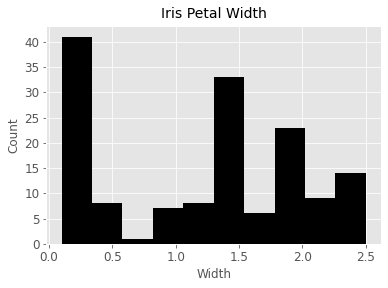

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'], color='black');
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

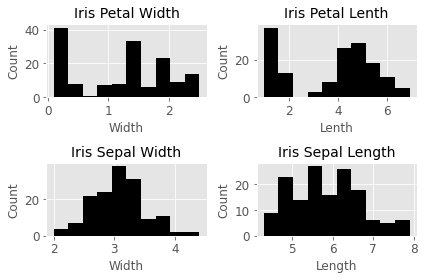

In [28]:
fig, ax = plt.subplots(2,2, figsize=(6,4))

ax[0][0].hist(df['petal width'], color='black');
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)

ax[0][1].hist(df['petal length'], color='black');
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Lenth', fontsize=12)
ax[0][1].set_title('Iris Petal Lenth', fontsize=14, y=1.01)

ax[1][0].hist(df['sepal width'], color='black');
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)

ax[1][1].hist(df['sepal length'], color='black');
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)

plt.tight_layout()

Text(0.5, 1.0, 'Petal Scatterplot')

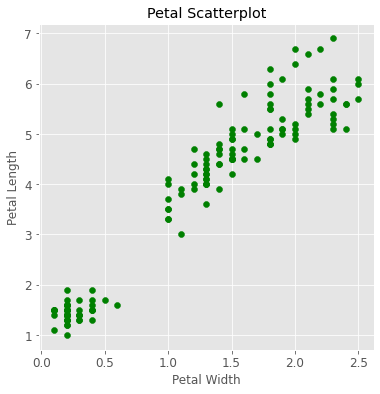

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'],df['petal length'], color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

Text(0.5, 1.0, 'Petal Length Plot')

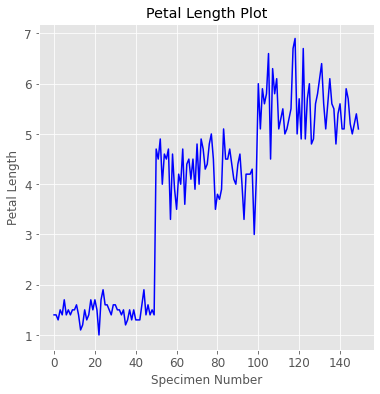

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['petal length'], color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

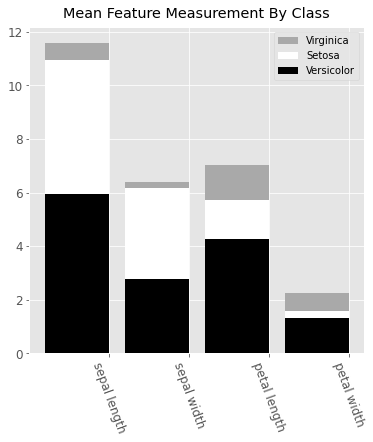

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


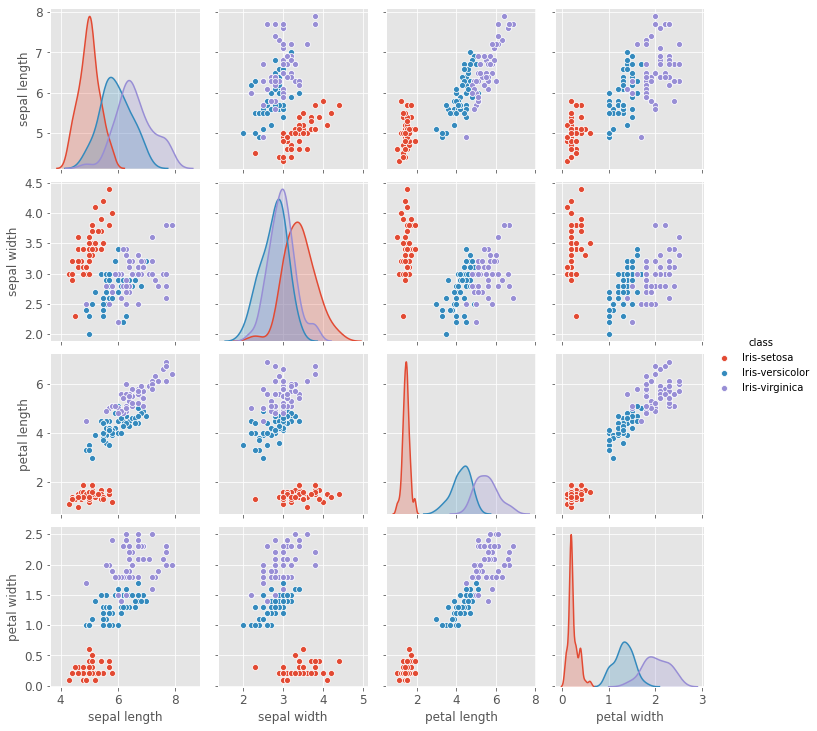

In [32]:

import seaborn as sns
sns.pairplot(df, hue="class")

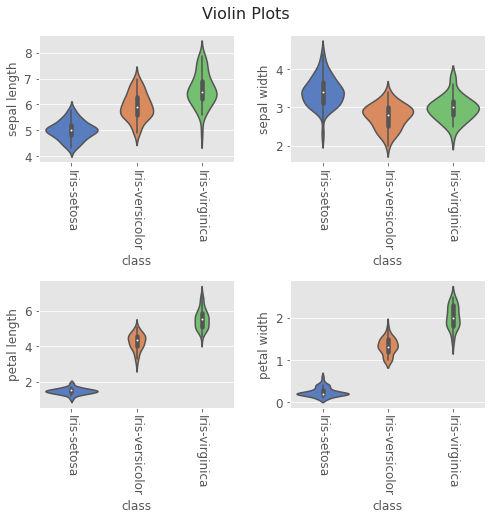

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()

In [34]:
df['class'] = df['class'].map({'Iris-setosa':'SET', 'Iris-virginica': 'VIR', 'Iris-versicolor': 'VER'})
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIR
146,6.3,2.5,5.0,1.9,VIR
147,6.5,3.0,5.2,2.0,VIR
148,6.2,3.4,5.4,2.3,VIR


In [35]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >= 1.3 else 0)
df

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIR,1
146,6.3,2.5,5.0,1.9,VIR,1
147,6.5,3.0,5.2,2.0,VIR,1
148,6.2,3.4,5.4,2.3,VIR,1


In [36]:
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'], axis=1)
df

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIR,1,11.96
146,6.3,2.5,5.0,1.9,VIR,1,9.50
147,6.5,3.0,5.2,2.0,VIR,1,10.40
148,6.2,3.4,5.4,2.3,VIR,1,12.42


In [37]:
df.applymap(lambda v: np.log(v) if isinstance(v, float) else v)

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,SET,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,SET,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,SET,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,SET,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,SET,0,-1.272966
...,...,...,...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909,VIR,1,2.481568
146,1.840550,0.916291,1.609438,0.641854,VIR,1,2.251292
147,1.871802,1.098612,1.648659,0.693147,VIR,1,2.341806
148,1.824549,1.223775,1.686399,0.832909,VIR,1,2.519308


In [38]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
SET,5.006,3.418,1.464,0.244,0.0,0.3628
VER,5.936,2.770,4.260,1.326,0.7,5.7204
VIR,6.588,2.974,5.552,2.026,1.0,11.2962


In [39]:
df.groupby('class').describe()

sepal length                        ... petal area                      
             count   mean       std  min  ...        25%     50%    75%    max
class                                     ...                                 
SET           50.0  5.006  0.352490  4.3  ...     0.2650   0.300   0.42   0.96
VER           50.0  5.936  0.516171  4.9  ...     4.8600   5.615   6.75   8.64
VIR           50.0  6.588  0.635880  4.9  ...     9.7175  11.445  12.79  15.87

[3 rows x 48 columns]

In [40]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[SET]
0.2,[SET]
0.3,[SET]
0.4,[SET]
0.5,[SET]
0.6,[SET]
1.0,[VER]
1.1,[VER]
1.2,[VER]


Text(0.5, 1.02, 'Setosa Sepal Width vs. Sepal Length')

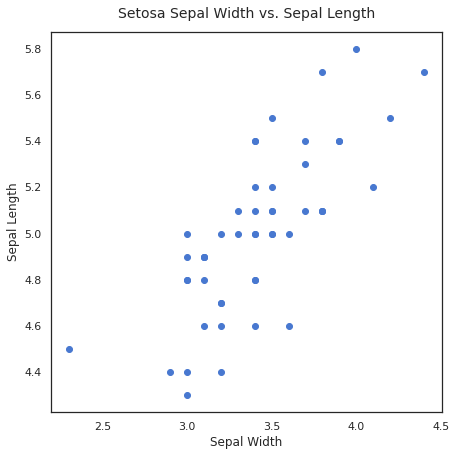

In [43]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)

In [44]:
import statsmodels.api as sm

y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           4.75e-10
Time:                        16:43:01   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

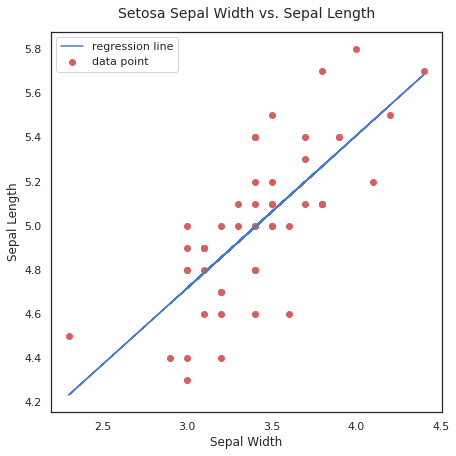

In [45]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# RFC 
clf = RandomForestClassifier(max_depth=5, n_estimators=10)

X = df[['sepal length','sepal width','petal length', 'petal width','wide petal','petal area' ]]
y = df['class']

# sepal length- 	sepal width- 	petal length- 	petal width- 	class- 	wide petal	- petal area- 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
    
rf

,predicted,actual,correct
0,VIR,VIR,1
1,VIR,VER,0
2,VIR,VIR,1
3,SET,SET,1
4,SET,SET,1
5,SET,SET,1
6,SET,SET,1
7,SET,SET,1
8,VIR,VIR,1
9,VIR,VIR,1


In [56]:
df

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIR,1,11.96
146,6.3,2.5,5.0,1.9,VIR,1,9.50
147,6.5,3.0,5.2,2.0,VIR,1,10.40
148,6.2,3.4,5.4,2.3,VIR,1,12.42


In [58]:
rf['correct'].sum()/rf['correct'].count()

0.9777777777777777

In [ ]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

plt.bar(range(len(f_importances)), imps, color="r", yerr=errs, align="center")
plt.xticks(range(len(f_importances)), labels);

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# One Vs Rest Classifier linear
clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.ix[:,:4]
y = np.array(df.ix[:,4]).astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
    
rf

In [ ]:
rf['correct'].sum()/rf['correct'].count()